# Conjunto de Exemplos para a Aula de SVM

In [1]:
# include everything

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets

%matplotlib inline

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18


## SVM: Maximum margin separating hyperplane


Plot the maximum margin separating hyperplane within a two-class
separable dataset using a Support Vector Machine classifier with
linear kernel.


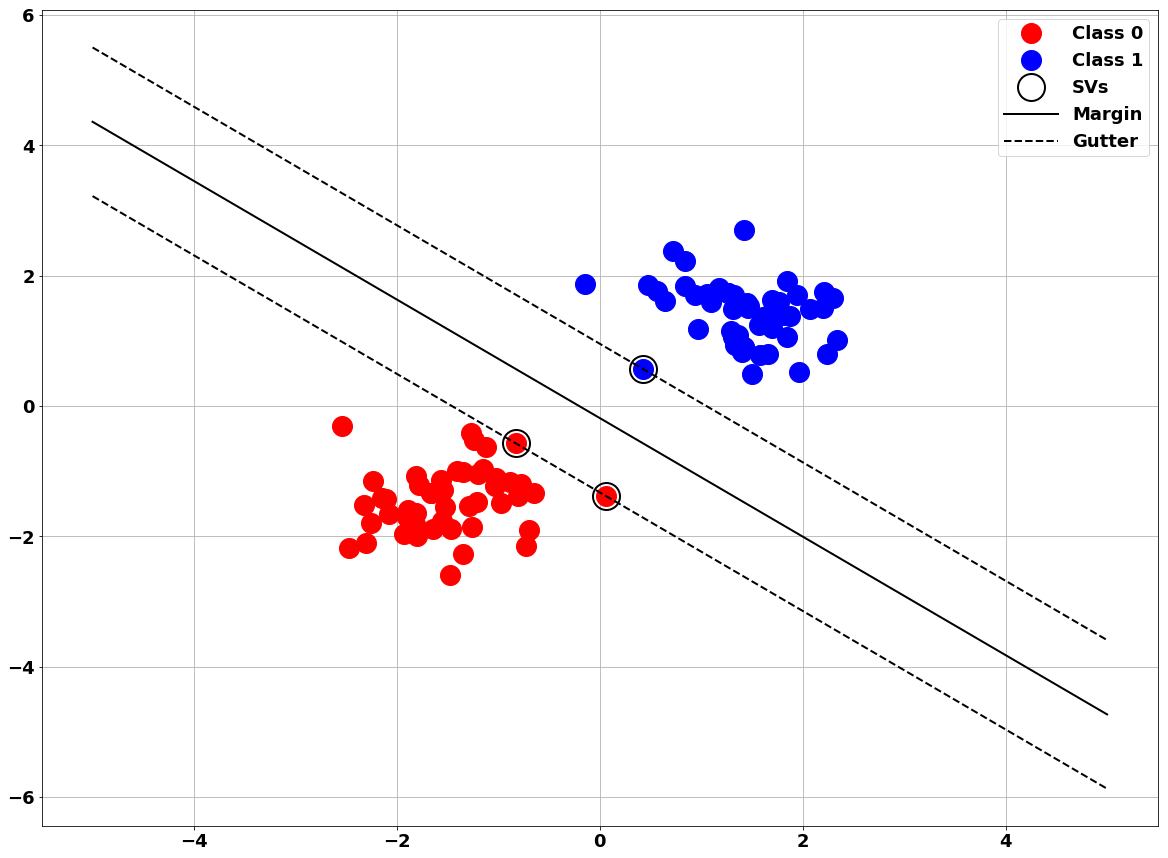

In [3]:
# we create 40 separable points
#np.random.seed(0)

n_events = 50

angle = np.pi/2.
rotation_matrix = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]

m_means = [-1.5,1.5]
m_vars = [0.5,0.5]

data_c1 = m_vars*np.random.randn(n_events,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)

m_means = [1.5,-1.5]
m_vars = [0.5,0.5]

data_c2 = m_vars*np.random.randn(n_events,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

X = np.append(data_c1, data_c2,axis=0)
Y = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors

fig, subplot_array = plt.subplots(nrows=1, ncols=1,figsize=(20,15))

plt.plot(X[Y==0, 0], X[Y==0, 1],'o', color='red', markersize=20, fillstyle = 'full', label='Class 0')
plt.plot(X[Y==1, 0], X[Y==1, 1],'o', color='blue', markersize=20, fillstyle = 'full', label='Class 1')
plt.plot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],'o', markersize=27, 
         fillstyle = 'none', markeredgecolor = 'k',markeredgewidth = 2, label='SVs')

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-',markersize=20, label='Margin')

plt.plot(xx, yy_down, 'k--',linewidth=2.0,label='Gutter')
plt.plot(xx, yy_up, 'k--',linewidth=2.0)

plt.legend(fontsize=18)
plt.grid()


plt.axis('tight')

plt.show()

## SVM: Maximum margin separating hyperplane


Plot the maximum margin separating hyperplane within a two-class
non-separable dataset using a Support Vector Machine classifier with
linear kernel.


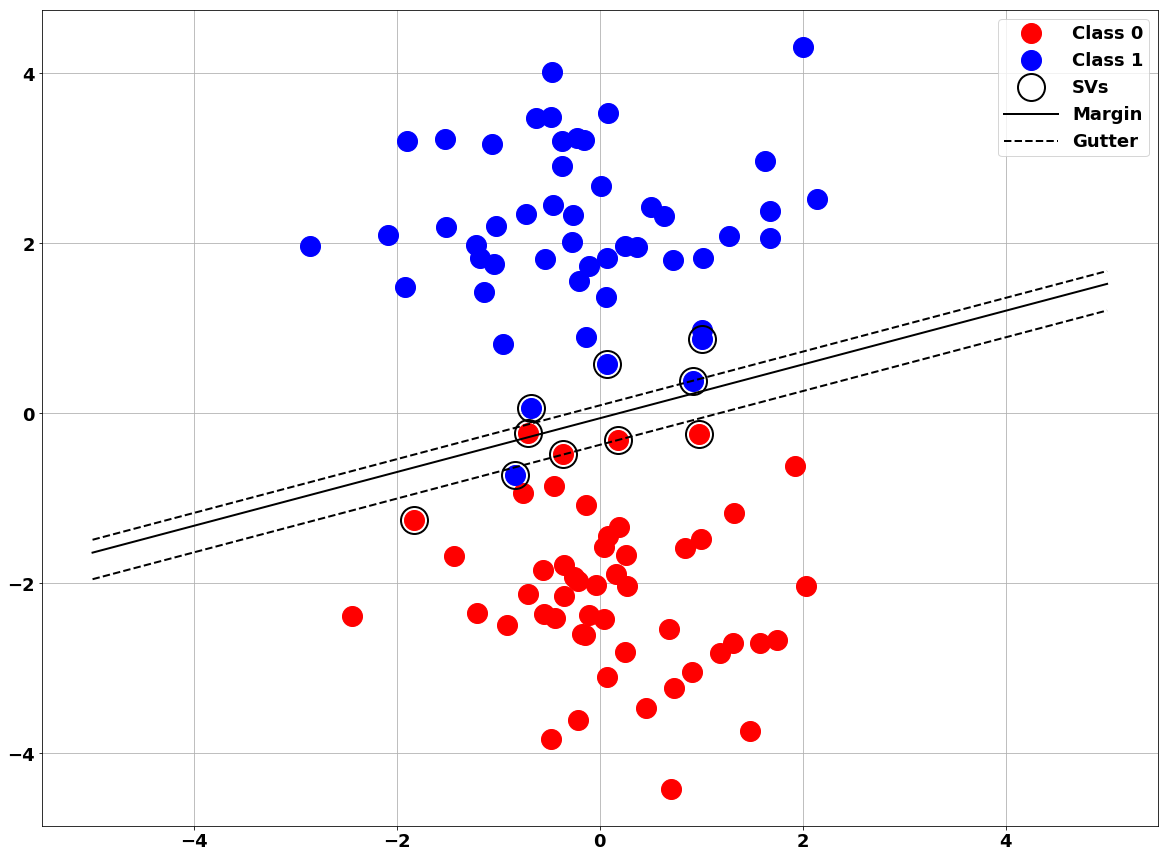

In [111]:
n_events = 50

angle = 3.*np.pi/4.
rotation_matrix = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]

m_means = [-1.5,1.5]
m_vars = [1.,1.]

data_c1 = m_vars*np.random.randn(n_events,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)

m_means = [1.5,-1.5]
m_vars = [1.,1.]

data_c2 = m_vars*np.random.randn(n_events,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

X = np.append(data_c1, data_c2,axis=0)
Y = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)


# fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors

fig, subplot_array = plt.subplots(nrows=1, ncols=1,figsize=(20,15))

plt.plot(X[Y==0, 0], X[Y==0, 1],'o', color='red', markersize=20, fillstyle = 'full', label='Class 0')
plt.plot(X[Y==1, 0], X[Y==1, 1],'o', color='blue', markersize=20, fillstyle = 'full', label='Class 1')
plt.plot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],'o', markersize=27, 
         fillstyle = 'none', markeredgecolor = 'k',markeredgewidth = 2, label='SVs')

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-',markersize=20, label='Margin')

plt.plot(xx, yy_down, 'k--',linewidth=2.0,label='Gutter')
plt.plot(xx, yy_up, 'k--',linewidth=2.0)

plt.legend(fontsize=18)
plt.grid()

plt.axis('tight')

plt.show()

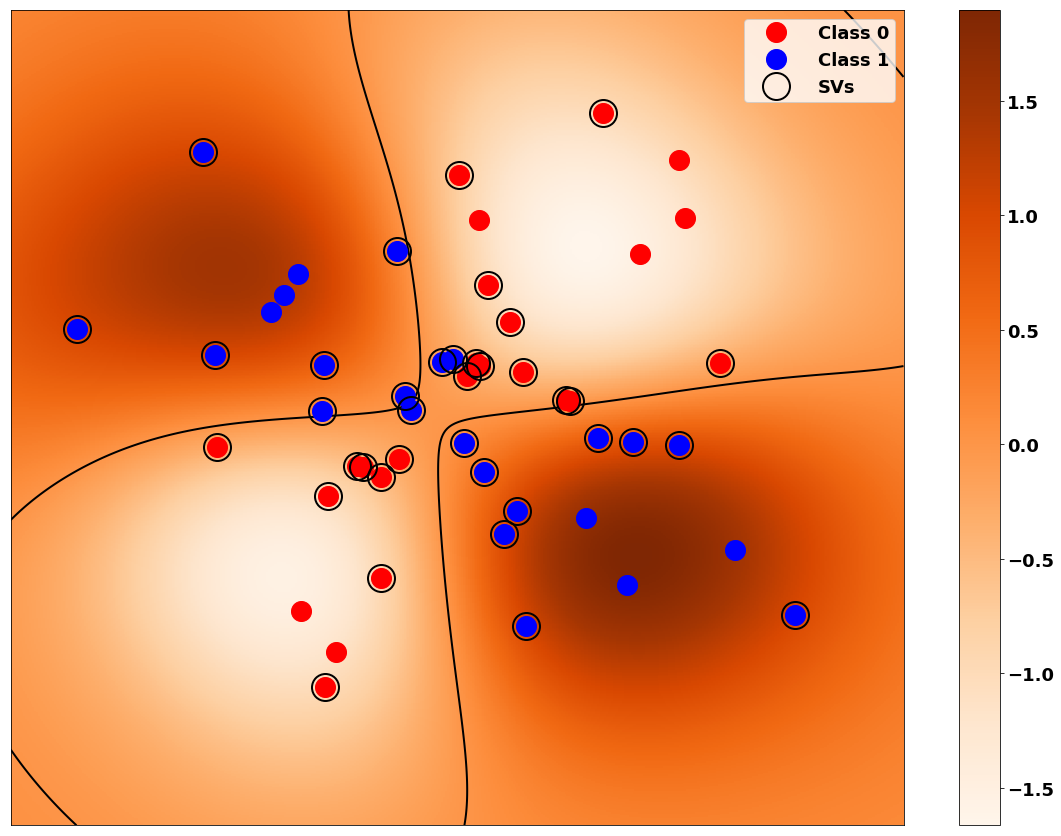

In [112]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(50, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)


fig, subplot_array = plt.subplots(nrows=1, ncols=1,figsize=(20,15))

# fit the model - kernel types:  ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid'
clf = svm.SVC(kernel='rbf')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.Oranges)
plt.colorbar()

plt.plot(X[Y==0, 0], X[Y==0, 1],'o', color='red', markersize=20, fillstyle = 'full', label='Class 0')
plt.plot(X[Y==1, 0], X[Y==1, 1],'o', color='blue', markersize=20, fillstyle = 'full', label='Class 1')
plt.plot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],'o', markersize=27, 
         fillstyle = 'none', markeredgecolor = 'k',markeredgewidth = 2, label='SVs')
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--',colors='k',label= 'Margin')

plt.legend(loc='best',fontsize=18)
plt.grid()

plt.xticks(())
plt.yticks(())

plt.axis('tight')
plt.show()


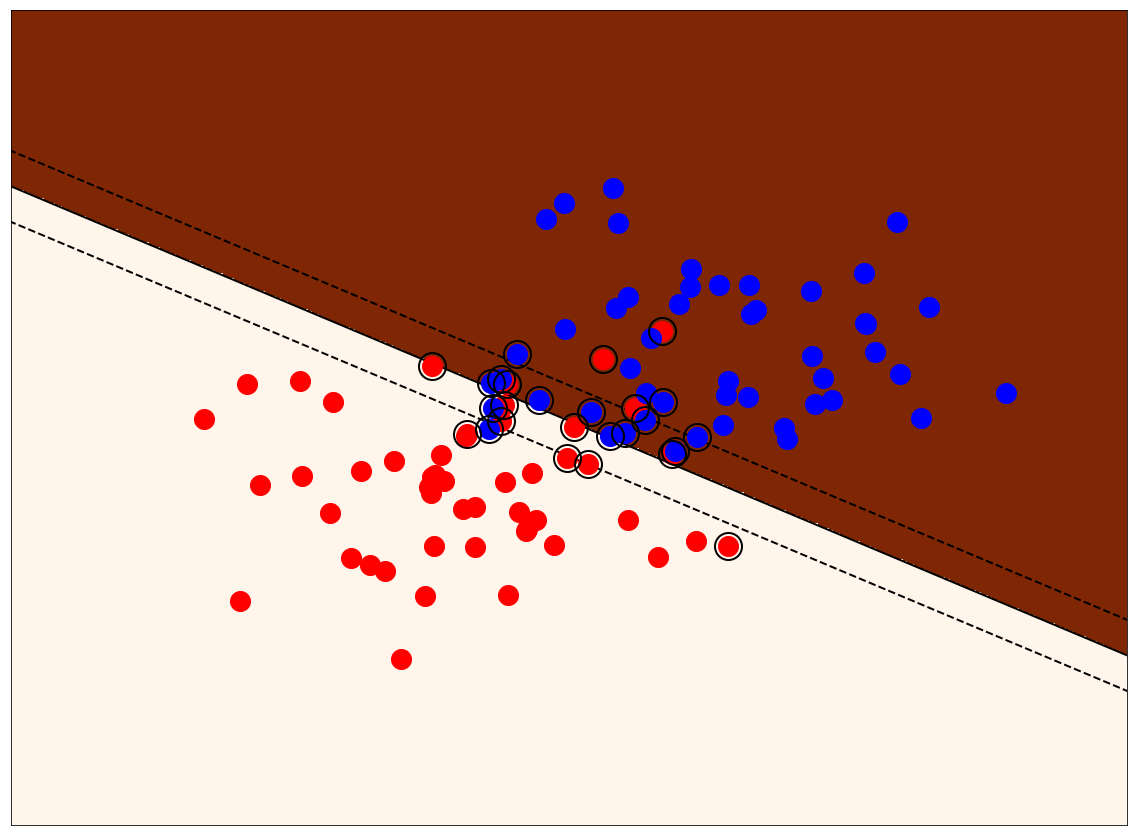

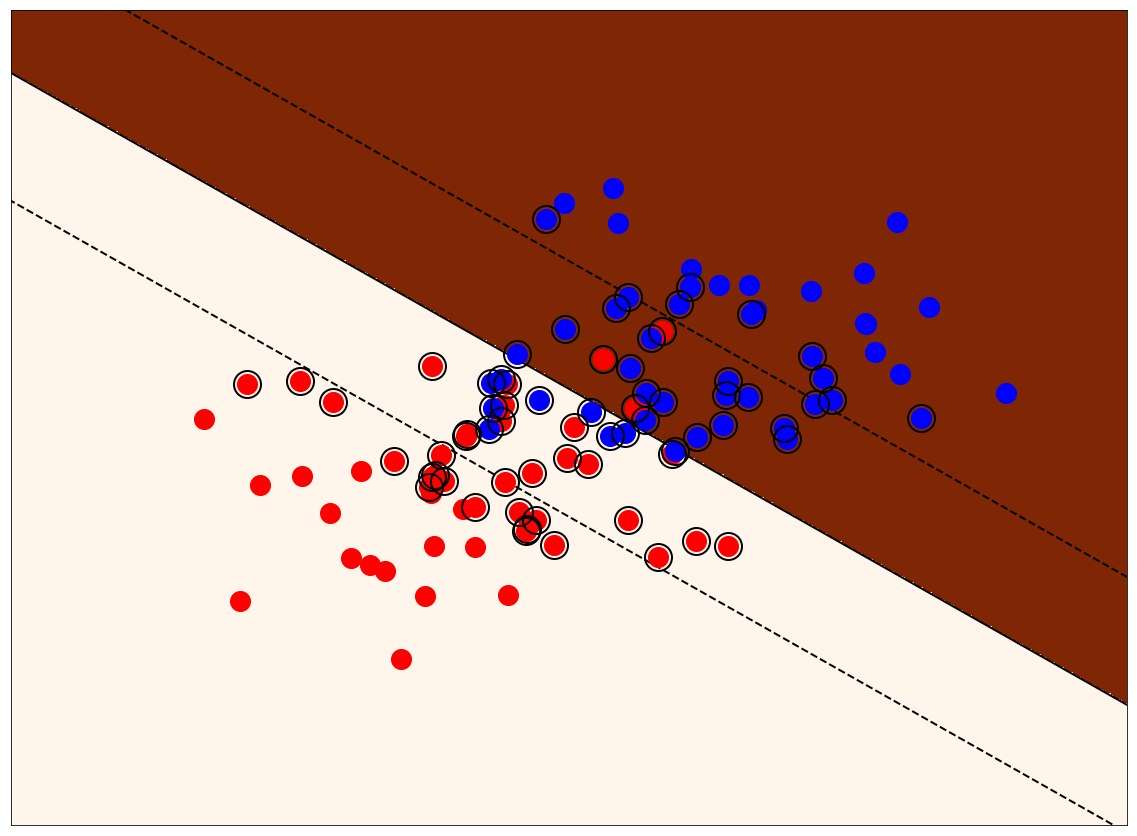

In [138]:
# we create 40 separable points
np.random.seed(0)
n_events = 50

angle = np.pi/2.
rotation_matrix = [[np.cos(angle), -np.sin(angle)],[np.sin(angle), np.cos(angle)]]

m_means = [-1.,1.]
m_vars = [1.0,1.0]

data_c1 = m_vars*np.random.randn(n_events,2)+m_means
data_c1 = np.inner(data_c1,rotation_matrix)

m_means = [1.,-1.]
m_vars = [1.0,1.0]

data_c2 = m_vars*np.random.randn(n_events,2)+m_means
data_c2 = np.inner(data_c2,rotation_matrix)

X = np.append(data_c1, data_c2,axis=0)
Y = np.append(np.zeros(data_c1.shape[0]),np.ones(data_c2.shape[0]),axis=0)

# figure number
fignum = 1


# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.01)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(20, 15))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    #plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1000,
    #            facecolors='none', zorder=10)
    plt.plot(X[Y==0, 0], X[Y==0, 1],'o', color='red', markersize=20, fillstyle = 'full', label='Class 0')
    plt.plot(X[Y==1, 0], X[Y==1, 1],'o', color='blue', markersize=20, fillstyle = 'full', label='Class 1')
    plt.plot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],'o', markersize=27, 
             fillstyle = 'none', markeredgecolor = 'k',markeredgewidth = 2, label='SVs')



    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(20, 15))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Oranges)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

In [128]:
np.mgrid[-1:1:100j]

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

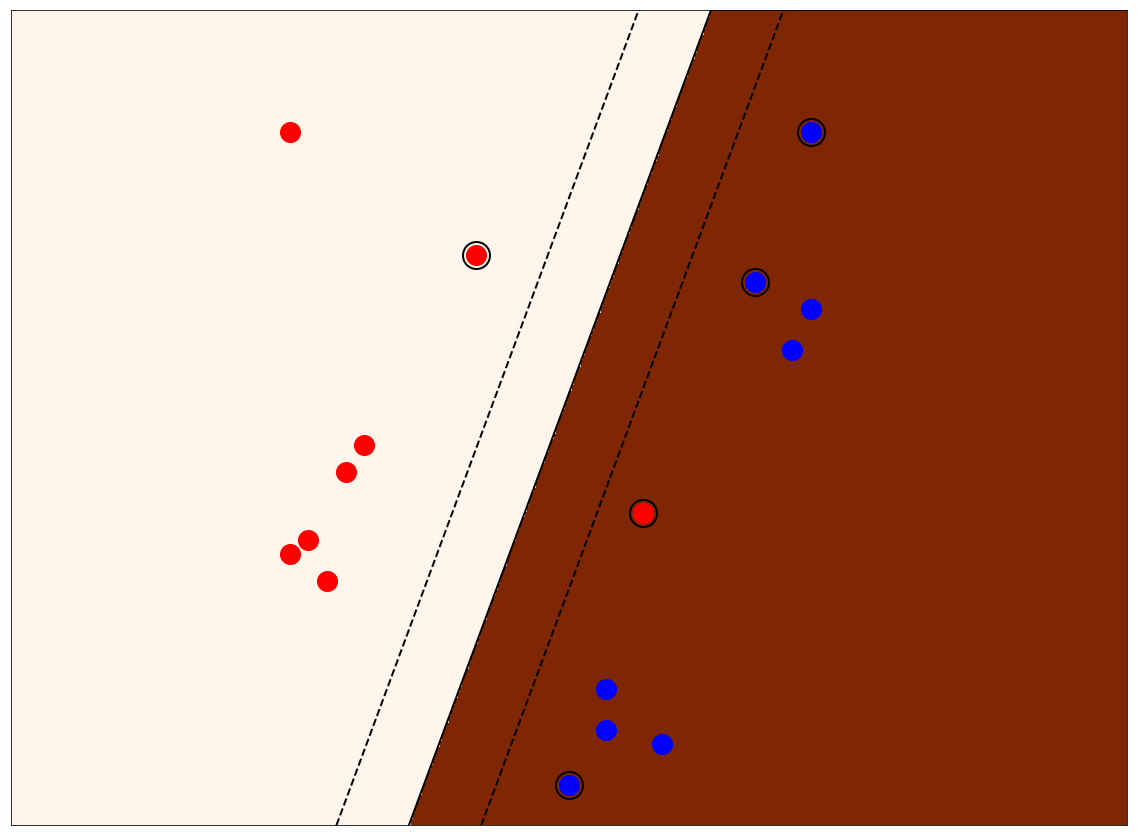

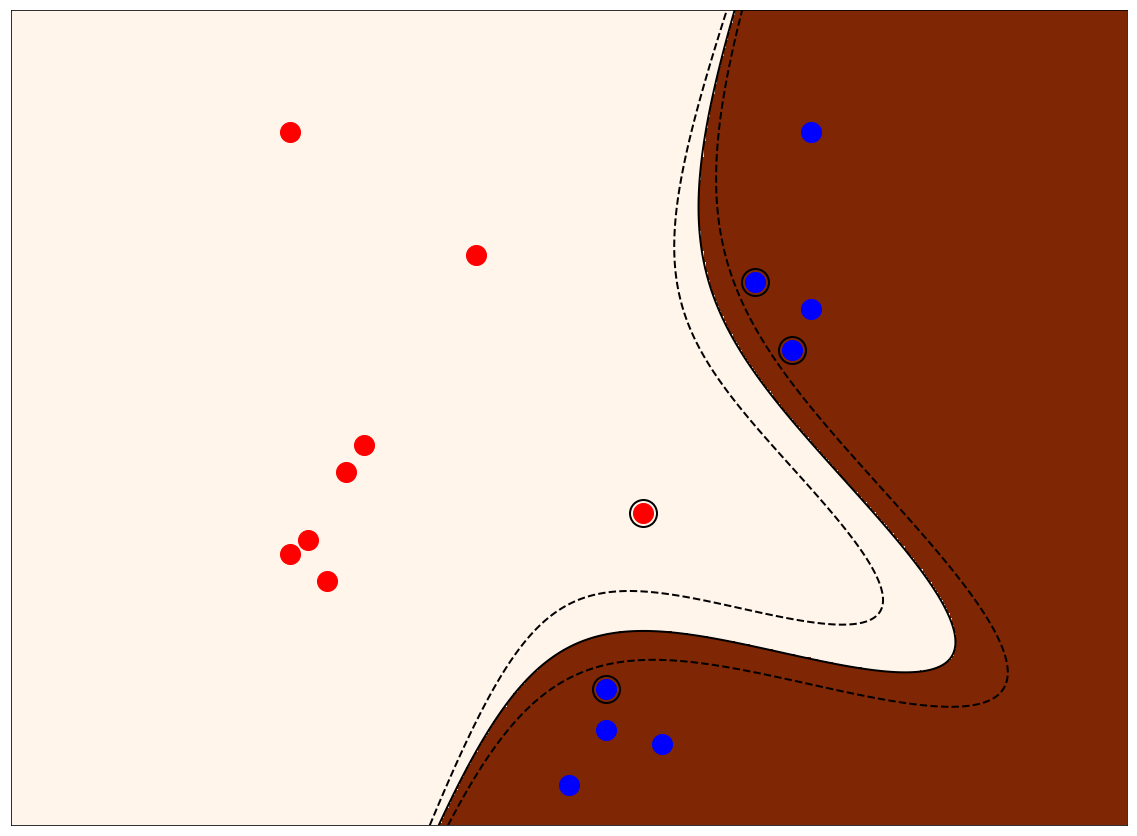

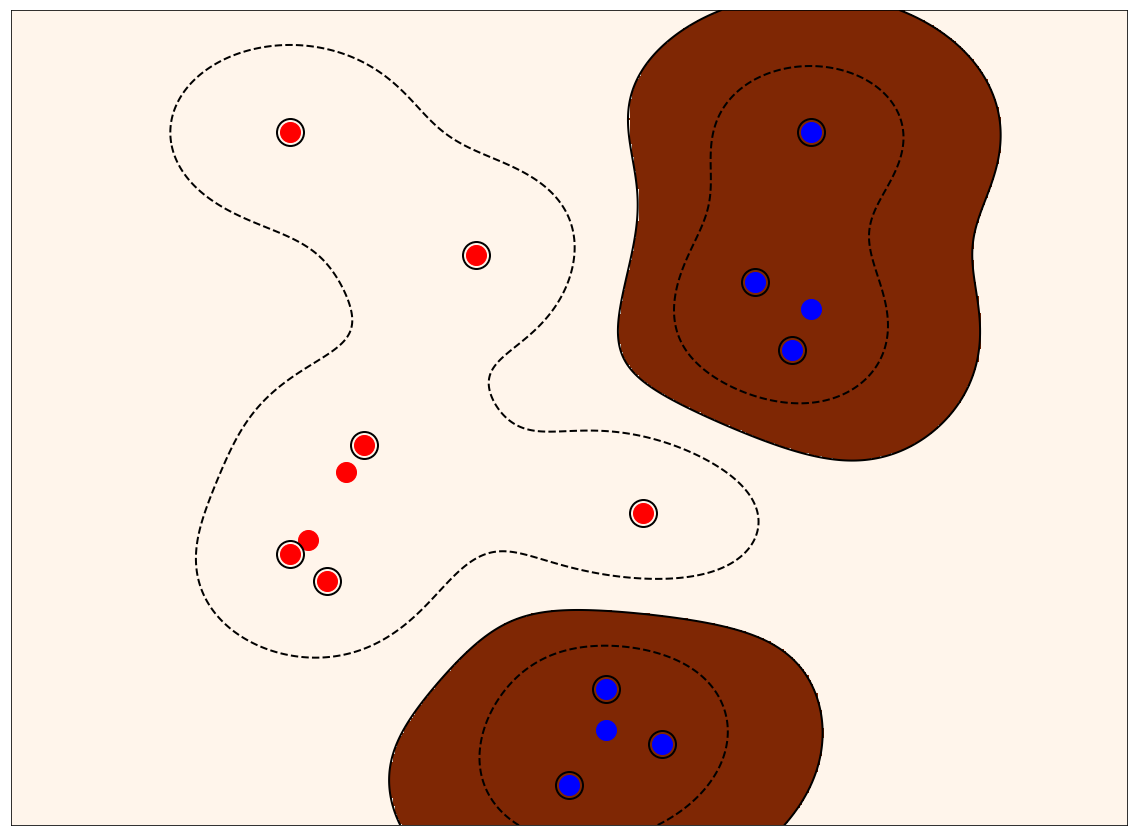

In [130]:
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = np.zeros(8)
Y = np.append(Y,np.ones(8))

# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(20, 15))
    plt.clf()
    
    plt.plot(X[Y==0, 0], X[Y==0, 1],'o', color='red', markersize=20, fillstyle = 'full', label='Class 0')
    plt.plot(X[Y==1, 0], X[Y==1, 1],'o', color='blue', markersize=20, fillstyle = 'full', label='Class 1')
    plt.plot(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],'o', markersize=27, 
             fillstyle = 'none', markeredgecolor = 'k',markeredgewidth = 2, label='SVs')



    #plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=1000,
    #            facecolors='none', zorder=10)
    #plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=20, cmap=plt.cm.Paired, s=500)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(20, 15))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Oranges)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

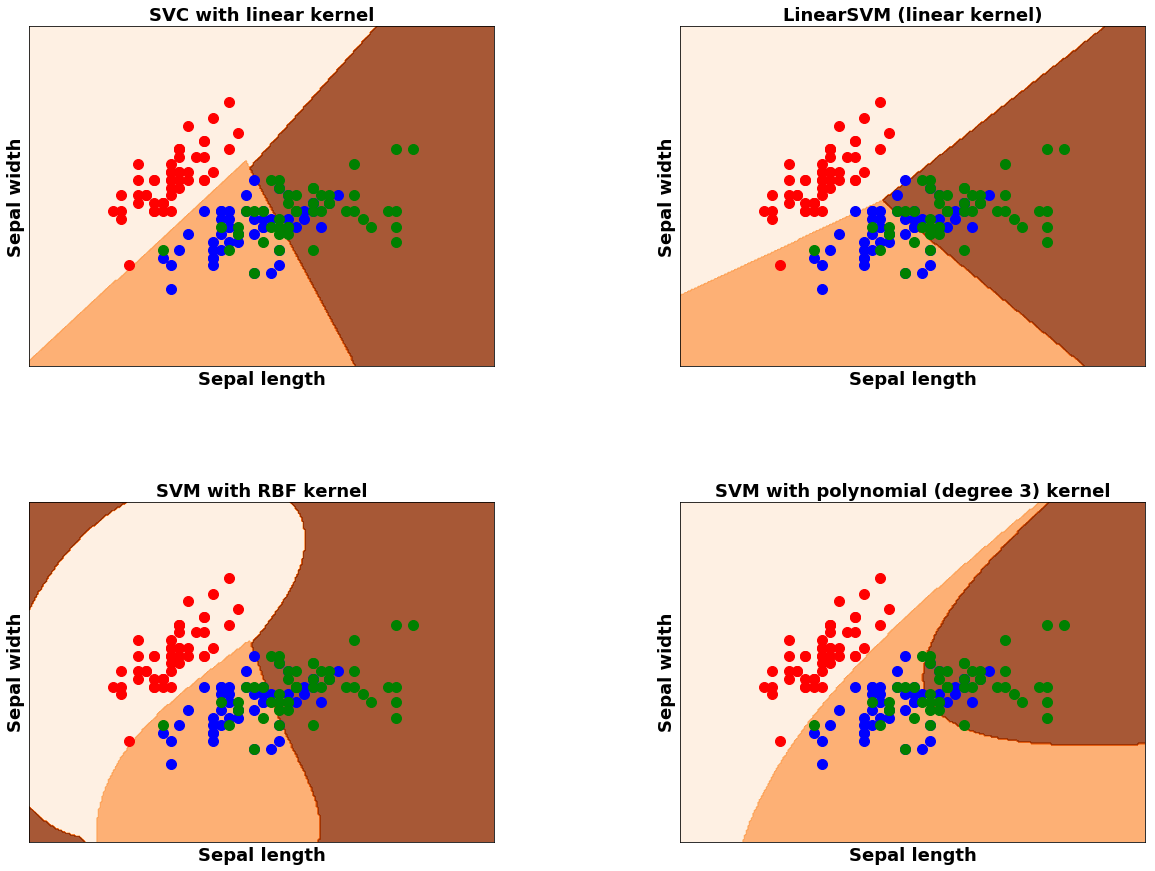

In [139]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVM (linear kernel)',
          'SVM with RBF kernel',
          'SVM with polynomial (degree 3) kernel']


plt.figure(figsize=(20, 15))
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Oranges, alpha=0.8)

    # Plot also the training points
    plt.plot(X[y==0, 0], X[y==0, 1],'o', color='red', markersize=10, fillstyle = 'full', label='Class 0')
    plt.plot(X[y==1, 0], X[y==1, 1],'o', color='blue', markersize=10, fillstyle = 'full', label='Class 1')
    plt.plot(X[y==2, 0], X[y==2, 1],'o', color='green', markersize=10, fillstyle = 'full', label='Class 2')
    plt.xlabel('Sepal length',fontsize=18,fontweight='bold')
    plt.ylabel('Sepal width',fontsize=18,fontweight='bold')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i],fontsize=18,fontweight='bold')

plt.show()